In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  
from numpy.linalg import inv

## Load data

In [2]:
df = pd.read_csv('datasets/weight-height.csv')
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


## Transform data

In [3]:
df = df.sample(50)
df['Height'] = 2.54 * df['Height']
df['Weight'] = 0.45 * df['Weight']
df['Height_standardized'] = (df['Height'] - df['Height'].mean())/df['Height'].std()
df.describe()

,Height,Weight,Height_standardized
count,50.000000,50.000000,5.000000e+01
mean,168.365416,73.926478,-7.727152e-16
std,9.679339,13.649011,1.000000e+00
min,150.467565,48.276466,-1.849078e+00
25%,160.378610,61.343635,-8.251395e-01
50%,168.276482,76.992475,-9.187995e-03
75%,175.956640,85.126529,7.842709e-01
max,187.240527,98.639045,1.950041e+00


## Visualize data

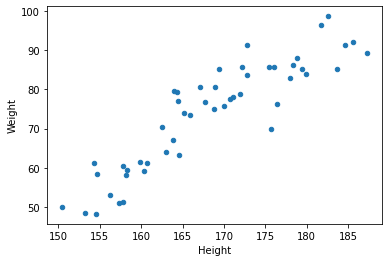

In [4]:
df[['Height', 'Weight']].plot.scatter('Height', 'Weight')
plt.show()

## Make your own model

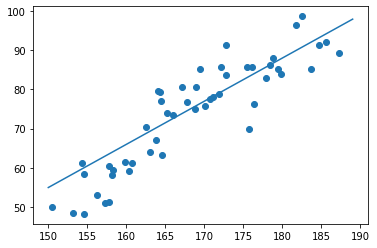

In [5]:
def predict(x):
    return -110 + 1.1 * x

x = np.arange(150, 190)
y = predict(x)

plt.plot(x, y)
plt.scatter(df['Height'], df['Weight'])
plt.show()

## Make your model class (to be parameterized)

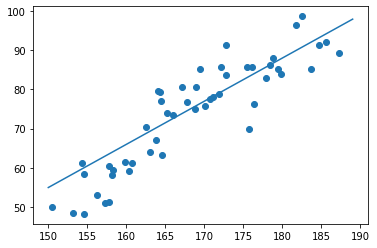

In [6]:
class MyModel():
    def __init__(self, w0, w1):
        self.w0 = w0
        self.w1 = w1
    def predict(self, x):
        return self.w0 + self.w1 * x

my_model = MyModel(-110, 1.1)

x = np.arange(150, 190)
y = my_model.predict(x)

plt.plot(x, y)
plt.scatter(df['Height'], df['Weight'])
plt.show()

## Which one is a better model?

- Define your loss/cost function.
- MSE
- MAE

MAE=5.050528414576565
MSE=38.31583168742878


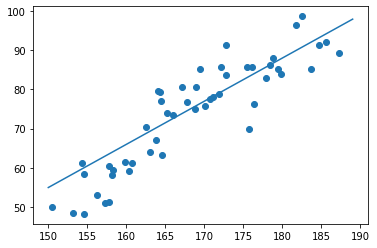

In [7]:
class MyModel():
    def __init__(self, w0, w1):
        self.w0 = w0
        self.w1 = w1
    def predict(self, x):
        return self.w0 + self.w1 * x
    
def calculate_mae(prediction, ground_truth):
    return np.mean(np.absolute(prediction - ground_truth))

def calculate_mse(prediction, ground_truth):
    return np.mean((prediction - ground_truth)**2)

my_model = MyModel(-110, 1.1)

mae = calculate_mae(my_model.predict(df['Height']), df['Weight'])
mse = calculate_mse(my_model.predict(df['Height']), df['Weight'])

print(f"MAE={mae}")
print(f"MSE={mse}")

x = np.arange(150, 190)
y = my_model.predict(x)

plt.plot(x, y)
plt.scatter(df['Height'], df['Weight'])
plt.show()

## Visualize loss landscape and improve

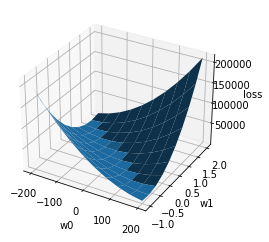

In [8]:
n0 = 10
n1 = 10

w0_list = []
w1_list = []
all_loss = []

for w0 in np.linspace(-200, 200, n0):
    for w1 in np.linspace(-1, 2, n1):
        model = MyModel(w0, w1)
        mse = calculate_mse(model.predict(df['Height']), df['Weight'])
        w0_list.append(w0)
        w1_list.append(w1)
        all_loss.append(mse)

X = np.array(w0_list).reshape(n0, n1)
Y = np.array(w1_list).reshape(n0, n1)
Z = np.array(all_loss).reshape(n0, n1)
        
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z)

ax.set_xlabel('w0')
ax.set_ylabel('w1')
ax.set_zlabel('loss')

plt.show()

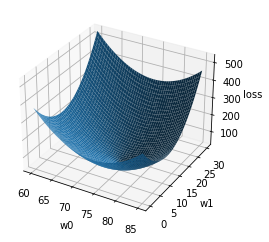

In [9]:
n0 = 50
n1 = 50

w0_list = []
w1_list = []
all_loss = []

for w0 in np.linspace(60, 85, n0):
    for w1 in np.linspace(0, 30, n1):
        model = MyModel(w0, w1)
        mse = calculate_mse(model.predict(df['Height_standardized']), df['Weight'])
        w0_list.append(w0)
        w1_list.append(w1)
        all_loss.append(mse)

X = np.array(w0_list).reshape(n0, n1)
Y = np.array(w1_list).reshape(n0, n1)
Z = np.array(all_loss).reshape(n0, n1)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z)

ax.set_xlabel('w0')
ax.set_ylabel('w1')
ax.set_zlabel('loss')

plt.show()

## Gradient descent

$$
{d \over {dx}} {f(x)} = \lim_{\Delta x \to 0} {{{f(x + \Delta x)} - {f(x)}}\over {\Delta x}}
$$

$$
{{\partial} \over {\partial w_0}} {\text{Loss}(w_0, w_1)} = \lim_{\Delta w \to 0} {{{\text{Loss}(w_0 + \Delta w, w_1)} - {\text{Loss}(w_0, w_1)}}\over {\Delta w}}
$$

$$
{{\partial} \over {\partial w_1}} {\text{Loss}(w_0, w_1)} = \lim_{\Delta w \to 0} {{{\text{Loss}(w_0, w_1 + \Delta w)} - {\text{Loss}(w_0, w_1)}}\over {\Delta w}}
$$

In [10]:
learning_rate = 0.3
small_w = 0.000000001

w0 = 100
w1 = 50

ground_truth = df["Weight"]

for i in range(1000):
    prediction = MyModel(w0, w1).predict(df["Height_standardized"])
    loss = calculate_mse(prediction, ground_truth)

    loss_with_delta_w0 = calculate_mse(MyModel(w0 + small_w, w1).predict(df["Height_standardized"]), ground_truth)
    w0_change = - learning_rate * (loss_with_delta_w0 - loss) / small_w

    loss_with_delta_w1 = calculate_mse(MyModel(w0, w1 + small_w).predict(df["Height_standardized"]), ground_truth)
    w1_change = - learning_rate * (loss_with_delta_w1 - loss) / small_w

    w0 = w0 + w0_change
    w1 = w1 + w1_change
    
prediction = MyModel(w0, w1).predict(df["Height_standardized"])
loss = calculate_mse(prediction, ground_truth)
print(loss)

33.966391427519476


## Normal equation

In [11]:
y = df["Weight"].to_numpy().reshape((-1, 1))
X = df["Height_standardized"]
X = np.stack([np.ones(X.shape), X], axis=1)
w = inv(X.T@X)@X.T@y
w

array([[73.92647774],
       [12.31405323]])

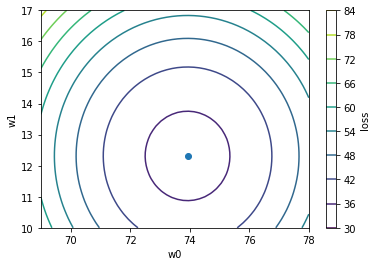

In [13]:
n0 = 50
n1 = 50

w0_list = []
w1_list = []
all_loss = []

for w0 in np.linspace(69,78, n0):
    for w1 in np.linspace(10, 17, n1):
        model = MyModel(w0, w1)
        loss = calculate_mse(model.predict(df['Height_standardized']), df['Weight'])
        w0_list.append(w0)
        w1_list.append(w1)
        all_loss.append(loss)

X = np.array(w0_list).reshape(n0, n1)
Y = np.array(w1_list).reshape(n0, n1)
Z = np.array(all_loss).reshape(n0, n1)

fig = plt.figure()
ax = fig.add_subplot()

ax.set_xlabel('w0')
ax.set_ylabel('w1')

CS = ax.contour(X, Y, Z)

cbar = fig.colorbar(CS)
cbar.ax.set_ylabel('loss')

ax.scatter(w[0], w[1])

plt.show()